# GARCH Model

**Generalized Autoregressive Conditional Heteroskedasticity, or GARCH, is an extension of the ARCH model that incorporates a moving average component together with the autoregressive component.**


In [3]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

##  $a_t = \varepsilon_t \sqrt{\omega + \alpha_1a^2_{t-1}+\alpha_2a^2_{t-2}+\beta_1\sigma^2_{t_1}+\beta_2\sigma^2_{t-2}}$

## $a_0,a_1 \sim N(0,1)$
## $\sigma_0 = 1, \sigma_1 = 1$

## $ \varepsilon_t \sim N(0,1)$ 

In [14]:
# Create Dataset

n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)] 
vols = [1 , 1] 

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2+beta_1*vols[-1]**1+beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

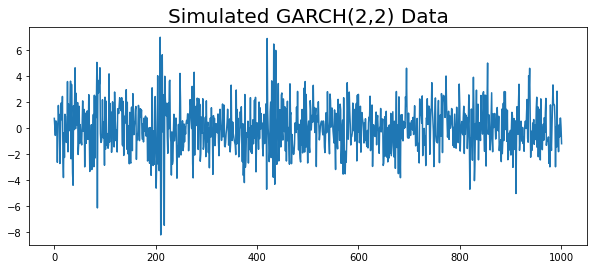

In [15]:
## plotting the series

plt.figure(figsize = (10,4))
plt.plot(series)
plt.title("Simulated GARCH(2,2) Data", fontsize = 20)

Text(0.5, 1.0, 'Data Volatility')

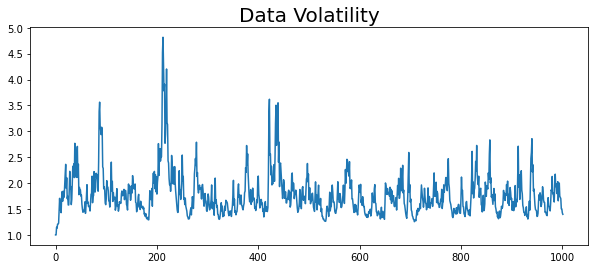

In [16]:
##plotting the volatility

plt.figure(figsize = (10,4))
plt.plot(vols)
plt.title("Data Volatility", fontsize = 20)

Text(0.5, 1.0, 'DAta and Volatility')

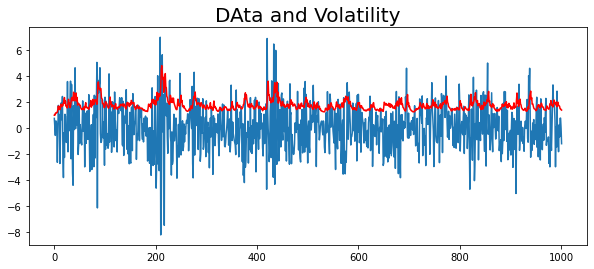

In [17]:
## Plotting the data and volatility

plt.figure(figsize = (10,4))
plt.plot(series)
plt.plot(vols, color = "red")
plt.title("DAta and Volatility", fontsize = 20)

# Plot PACF

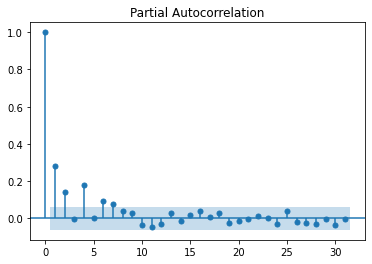

In [22]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH model

In [23]:
train, test = series[:-test_size], series[-test_size:]

In [24]:
model = arch_model(train, p = 2, q = 2)

In [25]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2295.395802905531
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2272.5541172037256
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2012.6916335439219
Iteration:      4,   Func. Count:     36,   Neg. LLF: 1889.6619574604065
Iteration:      5,   Func. Count:     45,   Neg. LLF: 1856.5161704371749
Iteration:      6,   Func. Count:     53,   Neg. LLF: 1767.5578157167856
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1770.331635580628
Iteration:      8,   Func. Count:     68,   Neg. LLF: 1767.1779928267486
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1767.167545620194
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1767.1668838584278
Iteration:     11,   Func. Count:     89,   Neg. LLF: 1767.1668327538143
Iteration:     12,   Func. Count:     96,   Neg. LLF: 1767.1668077044753
Iteration:     13,   Func. Count:    103,   Neg. LLF: 1767.166805185755
Iteration:     14,   Func. Count:    109,   Neg. LLF: 1

In [27]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1767.17
Distribution:                  Normal   AIC:                           3546.33
Method:            Maximum Likelihood   BIC:                           3575.16
                                        No. Observations:                  902
Date:                Tue, Nov 30 2021   Df Residuals:                      901
Time:                        01:53:57   Df Model:                            1
                                 Mean Model                                
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
mu         -5.2830e-03  5.341e-02 -9.891e-02      0.921 [ -0.

# Test the model


In [29]:
#Prediction

prediction = model_fit.forecast(horizon = test_size)

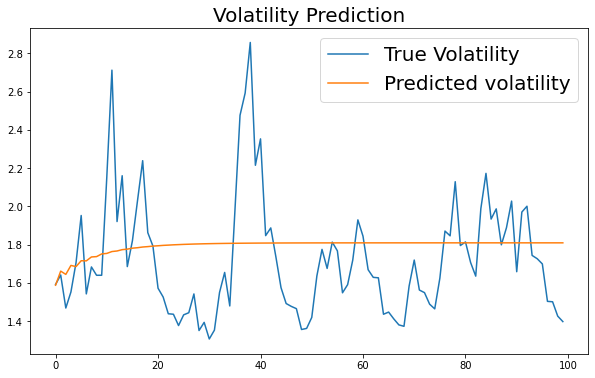

In [43]:
plt.figure(figsize = (10,6))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(prediction.variance.values[-1, :]))
plt.title("Volatility Prediction", fontsize = 20)
plt.legend(["True Volatility", "Predicted volatility"], fontsize = 20)

In [44]:
import warnings
warnings.filterwarnings("ignore")

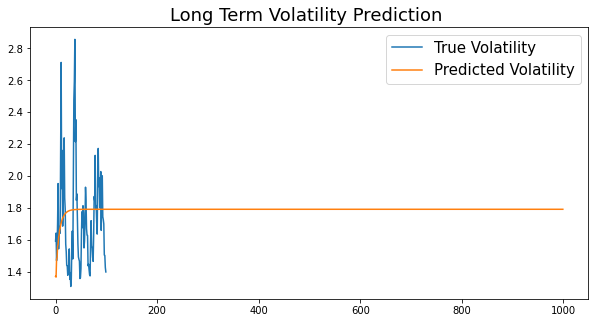

In [45]:
# Long time volatility prediction

long_term_pred = model_fit.forecast(horizon = 1000)
plt.figure(figsize = (10,5))
true, =  plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(long_term_pred.variance.values[-1, :]))
plt.title("Long Term Volatility Prediction ", fontsize = 18)
plt.legend(["True Volatility", "Predicted Volatility"], fontsize = 15)

# Rolling Forecast Origin

In [46]:
rolling_prediction = []

for i in range(test_size):
    train = series[:-(test_size - i)]
    model = arch_model(train, p= 2, q= 2)
    model_fit = model.fit(disp = "off")
    
    pred = model_fit.forecast(horizon = 1)
    rolling_prediction.append(np.sqrt(pred.variance.values[-1, :][0]))
    

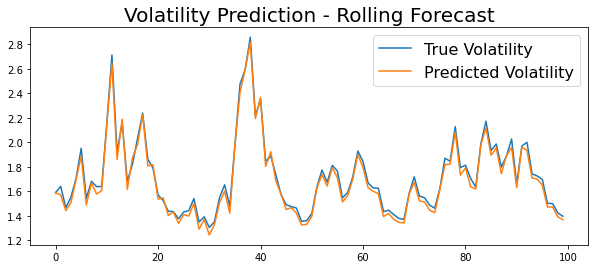

In [47]:
plt.figure(figsize = (10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_prediction)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)